# <center> ***Proyecto Integrador*** </center>
## <center> ***Avance 5*** </center>
### Profesores: Dra. Grettel Barceló, Dr. Luis Enrique Falcón. 
### Tutor: Dr Carlos Villaseñor
### Alumnos:

* Aurelio Antonio Lozano Rábago      A01081266


#### <p style='text-align: right;'> 2 de Junio del 2024 </p>

In [17]:
import pandas as np
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import torch
import tensorflow as tf
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [19]:
'''
def base_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(3, (5, 5), strides=(1, 1), input_shape=(224, 224, 3), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(3, (5, 5), strides=(1, 1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Convolution2D(24, (5, 5), strides=(1, 1), activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Convolution2D(36, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Convolution2D(48, (3, 3), strides=(2, 2), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(64, (3, 3), strides=(2, 2), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1164, activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='mse', optimizer=optimizer)
    return model
'''

"\ndef base_model():\n    model = tf.keras.models.Sequential()\n    model.add(tf.keras.layers.Convolution2D(3, (5, 5), strides=(1, 1), input_shape=(224, 224, 3), activation='relu'))\n    model.add(tf.keras.layers.Convolution2D(3, (5, 5), strides=(1, 1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))\n    model.add(Dropout(0.25))\n    model.add(tf.keras.layers.Convolution2D(24, (5, 5), strides=(1, 1), activation='relu'))\n    model.add(Dropout(0.25))\n    model.add(tf.keras.layers.Convolution2D(36, (5, 5), strides=(2, 2), activation='relu'))\n    model.add(Dropout(0.25))\n    model.add(tf.keras.layers.Convolution2D(48, (3, 3), strides=(2, 2), activation='relu'))\n    model.add(tf.keras.layers.Convolution2D(64, (3, 3), strides=(2, 2), activation='relu'))\n    model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))\n    model.add(tf.keras.layers.Flatten())\n    model.add(tf.keras.layers.Dense(1164, activation='relu'))\n    model.add(Dropout(0.25))\n    model

In [20]:
# Definir el modelo base DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

for layer in model.layers[:-5]:
    layer.trainable = False
for layer in model.layers[-5:]:
    layer.trainable = True

In [21]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('organized_data/train/',
                                                    target_size=(224, 224),
                                                    color_mode='rgb',
                                                    batch_size=50,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_directory('organized_data/val/',
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=25,
                                                class_mode='categorical',
                                                shuffle=True)


Found 3002 images belonging to 3 classes.


Found 823 images belonging to 3 classes.


In [22]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

# Usar fit en lugar de fit_generator
history = model.fit(train_generator, validation_data=val_generator,
                    steps_per_epoch=step_size_train, validation_steps=step_size_val,
                    epochs=25)

Epoch 1/25


c:\Users\44942\.conda\envs\new_gpu_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4170 - loss: 1.2321 - val_accuracy: 0.7387 - val_loss: 0.8272
Epoch 2/25
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1:22 1s/step - accuracy: 0.5800 - loss: 0.8844

c:\Users\44942\.conda\envs\new_gpu_env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5800 - loss: 0.8844 - val_accuracy: 0.6522 - val_loss: 0.7803
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6443 - loss: 0.8107 - val_accuracy: 0.8075 - val_loss: 0.5957
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7600 - loss: 0.6887 - val_accuracy: 0.7391 - val_loss: 0.5915
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7604 - loss: 0.6284 - val_accuracy: 0.8300 - val_loss: 0.4910
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8200 - loss: 0.4898 - val_accuracy: 0.8261 - val_loss: 0.4262
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.7834 - loss: 0.5290 - val_accuracy: 0.8462 - val_loss: 0.4525
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7400 - loss: 0.5690 - val_accuracy: 0.8696 - val_loss: 0.3661
Epoch 9/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8254 - loss: 0.4678 - val_accuracy: 0.8462 - val_loss: 0.

In [24]:
# Evaluación del modelo DenseNet121
y_pred_dense = model.predict(val_generator)
y_pred_dense_classes = np.argmax(y_pred_dense, axis=1)
y_true_classes = val_generator.classes

33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 858ms/step


Recordatorio de metricas

* matriz de confusion: muestra como clasifico cada clase (columna) y el renglon es la clase correcta.

* precision:  proporción de verdaderos positivos entre todos los casos que fueron clasificados como positivos (verdaderos positivos/(verdaderos positivos + falsos positivos))

* accuracy: proporción de todas las predicciones correctas (tanto verdaderos positivos como verdaderos negativos) entre el total de casos evaluados. (verd positivos + vdd negativos / total de casos)

* Recalll: sensibilidad de verdaderos positivos (verdaderos positivos /(vdd positivos + flasos negativos))

* combinacion de precision y recall 2 x ((prevision x recall)/(precision + recall))

In [25]:
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"Evaluación del modelo: {model_name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


In [26]:

# Evaluar el modelo DenseNet121
results = []
results.append(evaluate_model(y_true_classes, y_pred_dense_classes, "DenseNet121"))

Evaluación del modelo: DenseNet121
Confusion Matrix:
[[ 59  59  88]
 [ 77  78 117]
 [ 94 113 138]]
Accuracy: 0.3341
Precision: 0.3236
Recall: 0.3244
F1 Score: 0.3236
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.29      0.27       206
           1       0.31      0.29      0.30       272
           2       0.40      0.40      0.40       345

    accuracy                           0.33       823
   macro avg       0.32      0.32      0.32       823
weighted avg       0.34      0.33      0.33       823



Matriz de confusion muestra que el modelo esta prediciendo de manera incorrecta para las clases 0 y 1 y para la clase 2, hay una mejora pero aun asi las clasificaciones incorrectas son elevadas, reflejandose en una precision y exactitud bastante baja

In [27]:
# Preparar los datos para los modelos de ensamble
X_train_ensemble, y_train_ensemble = next(train_generator)
X_val_ensemble, y_val_ensemble = next(val_generator)

# Convertir las etiquetas a índices de clase
y_train_ensemble = np.argmax(y_train_ensemble, axis=1)
y_val_ensemble = np.argmax(y_val_ensemble, axis=1)

Usando logistic regresion por el siguiente error:

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[1], line 106
    103 y_val_ensemble = np.argmax(y_val_ensemble, axis=1)
    105 # Modelo homogéneo con Bagging usando DenseNet121
--> 106 bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)
    107 bagging_model.fit(X_train_ensemble.reshape(X_train_ensemble.shape[0], -1), y_train_ensemble)
    108 y_pred_bagging = bagging_model.predict(X_val_ensemble.reshape(X_val_ensemble.shape[0], -1))

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'


In [28]:
# Modelo homogéneo con Bagging
base_model1 = LogisticRegression(max_iter=1000)
bagging_model = BaggingClassifier(base_model1, n_estimators=50, random_state=42)
bagging_model.fit(X_train_ensemble.reshape(X_train_ensemble.shape[0], -1), y_train_ensemble)
y_pred_bagging = bagging_model.predict(X_val_ensemble.reshape(X_val_ensemble.shape[0], -1))
results.append(evaluate_model(y_val_ensemble, y_pred_bagging, "Bagging"))

Evaluación del modelo: Bagging
Confusion Matrix:
[[4 0 2]
 [0 4 5]
 [2 1 7]]
Accuracy: 0.6000
Precision: 0.6556
Recall: 0.6037
F1 Score: 0.6071
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.80      0.44      0.57         9
           2       0.50      0.70      0.58        10

    accuracy                           0.60        25
   macro avg       0.66      0.60      0.61        25
weighted avg       0.65      0.60      0.60        25



Debido a los errores, pude comparar el incremento en la mejora del modelo

In [29]:
# Modelo homogéneo con Boosting
boosting_model = AdaBoostClassifier(base_model1, n_estimators=50, random_state=42)
boosting_model.fit(X_train_ensemble.reshape(X_train_ensemble.shape[0], -1), y_train_ensemble)
y_pred_boosting = boosting_model.predict(X_val_ensemble.reshape(X_val_ensemble.shape[0], -1))
results.append(evaluate_model(y_val_ensemble, y_pred_boosting, "Boosting"))

c:\Users\44942\.conda\envs\new_gpu_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluación del modelo: Boosting
Confusion Matrix:
[[4 0 2]
 [0 4 5]
 [2 1 7]]
Accuracy: 0.6000
Precision: 0.6556
Recall: 0.6037
F1 Score: 0.6071
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.80      0.44      0.57         9
           2       0.50      0.70      0.58        10

    accuracy                           0.60        25
   macro avg       0.66      0.60      0.61        25
weighted avg       0.65      0.60      0.60        25



Aplicar boosting no mejora el rendimiento del modelo, por lo que el segundo modelo (entiendo el boosting como una secuencia de modelos) no esta logrando mejorar los errores del modelo original

In [30]:
# Modelo heterogéneo con Stacking
base_model2 = SVC(probability=True)
stacking_model = StackingClassifier(estimators=[('lr', base_model1), ('svc', base_model2)], final_estimator=RandomForestClassifier())
stacking_model.fit(X_train_ensemble.reshape(X_train_ensemble.shape[0], -1), y_train_ensemble)
y_pred_stacking = stacking_model.predict(X_val_ensemble.reshape(X_val_ensemble.shape[0], -1))
results.append(evaluate_model(y_val_ensemble, y_pred_stacking, "Stacking"))

Evaluación del modelo: Stacking
Confusion Matrix:
[[4 0 2]
 [0 6 3]
 [2 1 7]]
Accuracy: 0.6800
Precision: 0.7024
Recall: 0.6778
F1 Score: 0.6843
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.86      0.67      0.75         9
           2       0.58      0.70      0.64        10

    accuracy                           0.68        25
   macro avg       0.70      0.68      0.68        25
weighted avg       0.70      0.68      0.68        25



Stacking es el que mejor desempeno tiene de los modelos de ensamble, sin embargo sus resultados no son del todo satisfactorios.

In [31]:
# Modelo homogéneo con Blending
X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(X_train_ensemble.reshape(X_train_ensemble.shape[0], -1), y_train_ensemble, test_size=0.5, random_state=42)
base_model1.fit(X_train_blend, y_train_blend)
base_model2.fit(X_train_blend, y_train_blend)
pred1 = base_model1.predict_proba(X_val_blend)
pred2 = base_model2.predict_proba(X_val_blend)
blending_train_set = np.hstack((pred1, pred2))
blender_model = LogisticRegression(max_iter=1000)
blender_model.fit(blending_train_set, y_val_blend)
pred1_test = base_model1.predict_proba(X_val_ensemble.reshape(X_val_ensemble.shape[0], -1))
pred2_test = base_model2.predict_proba(X_val_ensemble.reshape(X_val_ensemble.shape[0], -1))
blending_test_set = np.hstack((pred1_test, pred2_test))
y_pred_blending = blender_model.predict(blending_test_set)
results.append(evaluate_model(y_val_ensemble, y_pred_blending, "Blending"))

Evaluación del modelo: Blending
Confusion Matrix:
[[1 3 2]
 [0 8 1]
 [2 7 1]]
Accuracy: 0.4000
Precision: 0.3426
Recall: 0.3852
F1 Score: 0.3192
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.44      0.89      0.59         9
           2       0.25      0.10      0.14        10

    accuracy                           0.40        25
   macro avg       0.34      0.39      0.32        25
weighted avg       0.34      0.40      0.32        25



el blending es el que tiene un desempeno mas pobre, dando accuracy por debajo de la media, lo que seria peor que hacer un volado.


Comparativa de modelos:
         Model  Accuracy  Precision    Recall  F1 Score
0  DenseNet121  0.334143   0.323618  0.324391  0.323552
1      Bagging  0.600000   0.655556  0.603704  0.607143
2     Boosting  0.600000   0.655556  0.603704  0.607143
3     Stacking  0.680000   0.702381  0.677778  0.684343
4     Blending  0.400000   0.342593  0.385185  0.319224


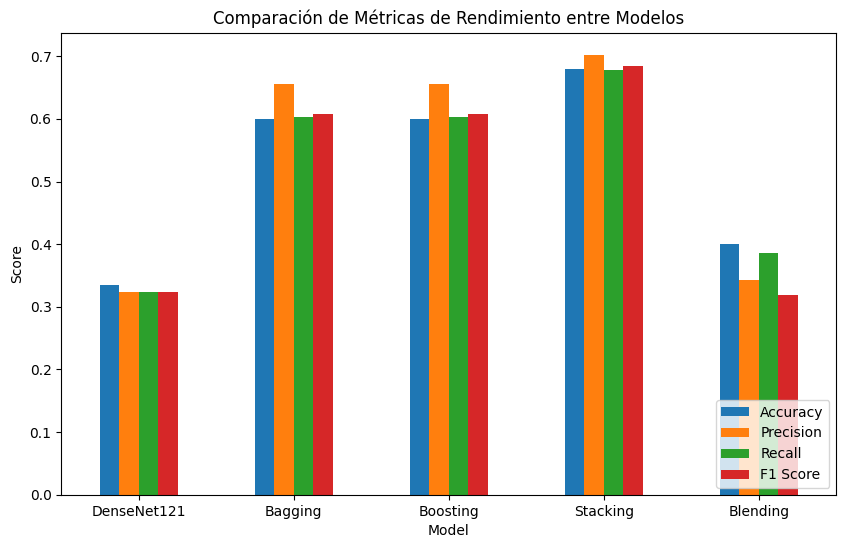

In [32]:
# Crear DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostrar la tabla comparativa
print("\nComparativa de modelos:")
print(results_df)

# Graficar las métricas de rendimiento
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas de Rendimiento entre Modelos')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

Con la tabla comparativa se puede apreciar el gran incremento en desempeno que un modelo ensamblado (combinacion de modelos para generar un modelo mas robusto) puede generar, donde incluso la peor de la estrategia, duplica el rendimiento del modelo original.

Dentro de los modelos ensamblados, la estrategia homogenea obtuvo un mejor desempeno que las heterogeneas. 